## Trying to Grouping Handawrittern Digit with K-means

In [28]:
from sklearn.datasets import load_digits
from PIL import Image
import numpy as np

In [3]:
digits = load_digits()
digits.data.shape

(1797, 64)

### Clustering the Digits

In [5]:
del k_means
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

## The result is 10 cluster in 64 dimension as each digits are 64 x 64 in dimension

In [12]:
from matplotlib import pyplot as plt

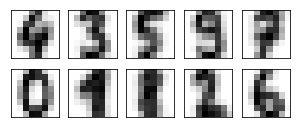

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(5, 2))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### K-means knows nothing about the identity of the cluster.So , we can fix this by matching each learned cluster label with the true labels found in them

In [26]:
from scipy.stats import mode

In [29]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(digits.target, labels)

0.7935447968836951